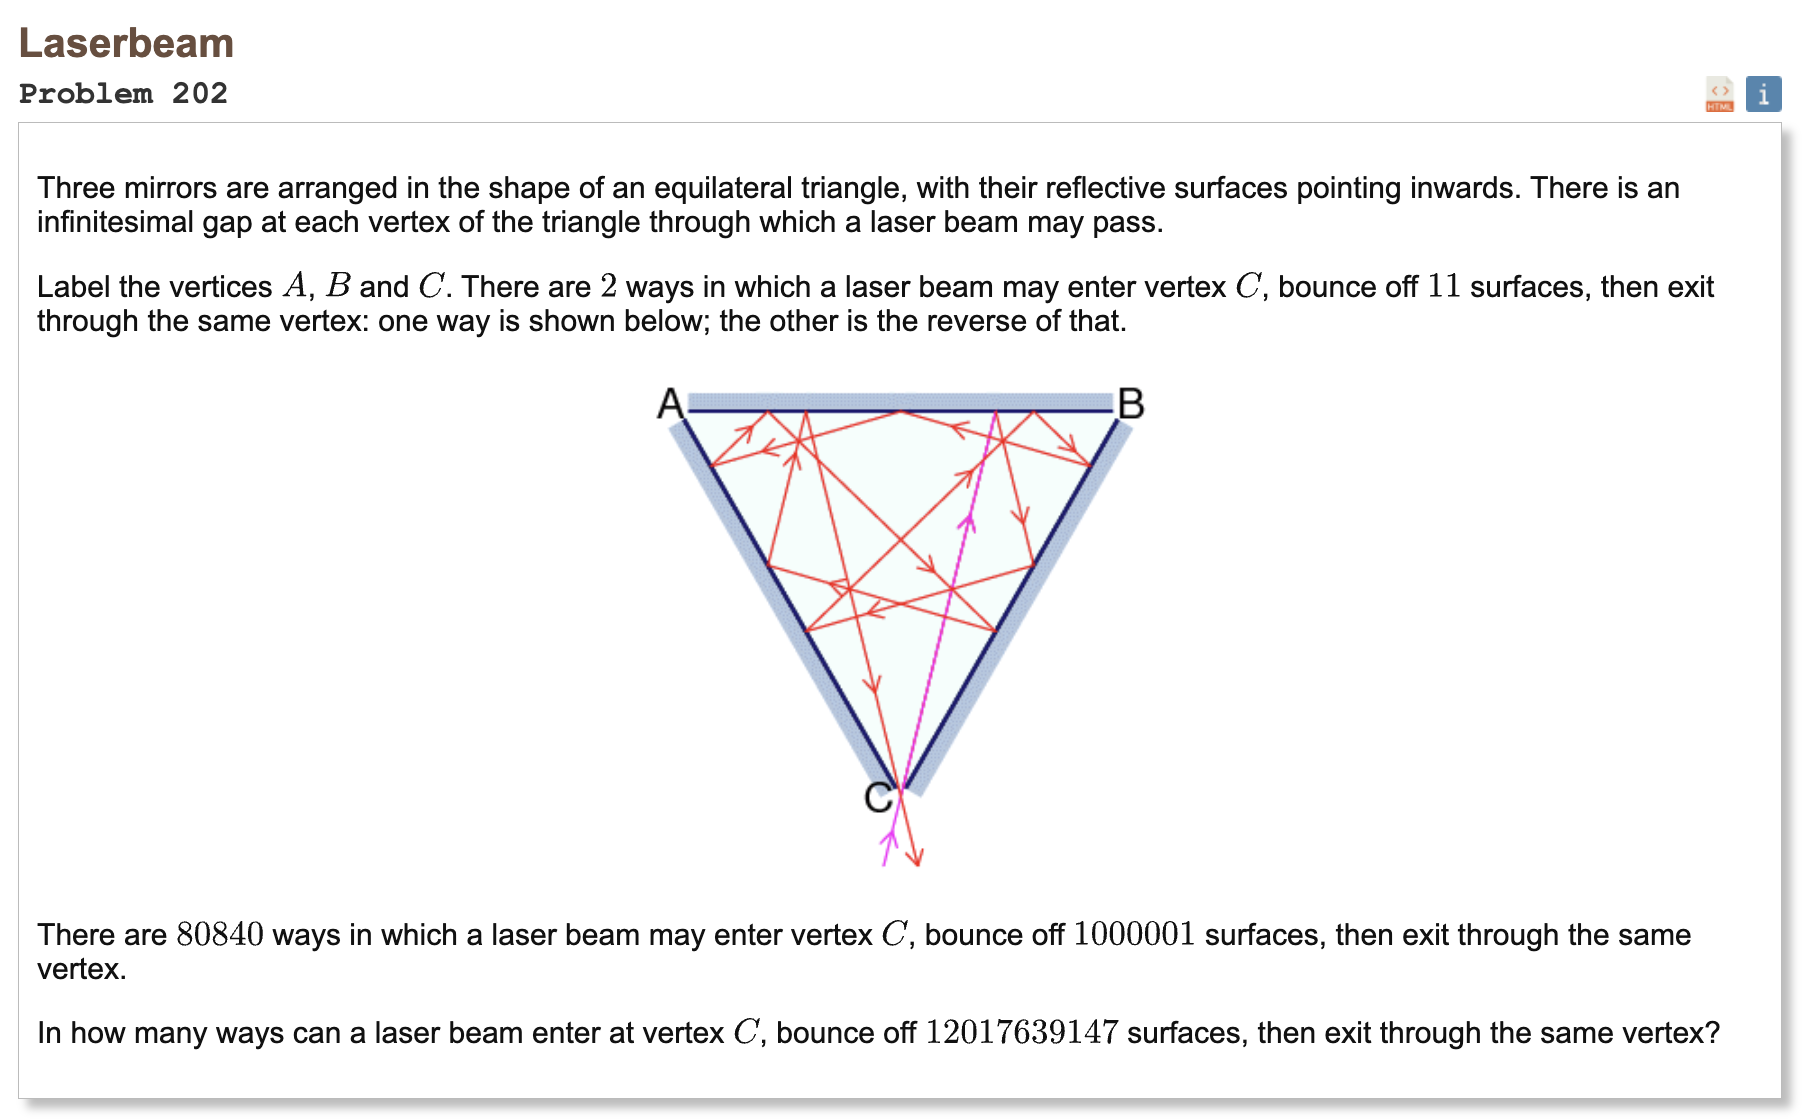

## Initial approach

In [1]:
import math

def factorize_distinct(n):
    factors = {}
    c = 0
    while n % 2 == 0:
        n //= 2
        c += 1
    if c:
        factors[2] = c
    f = 3
    while f * f <= n:
        if n % f == 0:
            c = 0
            while n % f == 0:
                n //= f
                c += 1
            factors[f] = c
        f += 2
    if n > 1:
        factors[n] = factors.get(n, 0) + 1
    return factors

def phi_from_factorization(factors):
    result = 1
    for p, e in factors.items():
        result *= (p - 1) * (p ** (e - 1))
    return result

def count_ways(N):
    if N % 2 == 0:
        return 0
    M = (N + 3) // 2
    if M % 3 == 0:
        return 0

    fac = factorize_distinct(M)
    ph = phi_from_factorization(fac)

    has_mod1 = any((p % 3) == 1 for p in fac.keys())
    if has_mod1:
        g = 0
    else:
        G = -1 if (M % 3) == 2 else 1
        r = len(fac)
        g = G * (1 << r)

    return (ph - g) // 3

In [2]:
%%time
N = 1001
result = count_ways(N)
print("Result:", result)

Result: 82
CPU times: user 95 μs, sys: 7 μs, total: 102 μs
Wall time: 100 μs
